
# OPIM 5512-  Data Science using Python, Spring 2024


## Hotel Booking Cancellation Analysis


```
Madhavi Muppani
Sai Teja Meka
Khyathi Manne
Caitlyn Kane
Pranathi Karne
Steeven Raj Burugula
```


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [164]:
data = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

In [165]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [166]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [167]:
data.shape

(119390, 32)

In [168]:
# Create a list of categorical columns. These are the columns in the dataframe 'data'
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :', cat_col)

# Create a list of numerical columns. These are the columns in the dataframe 'data'
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :', num_col)

Categorical columns : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Numerical columns : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [170]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [171]:
# Generating descriptive statistics for all columns

data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [172]:
# Count the occurrences of each unique value in the 'hotel' column of the DataFrame 'data'.

data.hotel.value_counts()


hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [173]:
# Check for missing values in each column of the DataFrame 'data'.
data.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [174]:
# Calculate the percentage of missing values in each column of the DataFrame 'data'.
(data.isnull().sum() / len(data)) * 100


hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

# Preprocessing of data

In [175]:
# dropping columns
data.drop(['company', 'country', 'reservation_status', 'assigned_room_type'], inplace=True, axis=1)


In [176]:
# Dropping the 'reservation_status_date' column from the 'data' DataFrame.
data.drop(['reservation_status_date'], inplace=True, axis=1)


In [177]:
# Fill missing values in the 'children' column with 0
data['children'].fillna(0, inplace=True)


In [178]:
# converting categorical agent variable to binary variable.
data['agent'] = data['agent'].notnull().astype(int)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,3,No Deposit,0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,4,No Deposit,0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,1,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,1,0,Transient,98.0,0,1


In [179]:
# combing children and babies to new column into binary variables and dropping indiviudals
data['kids'] = ((data['children'] > 0) | (data['babies'] > 0)).astype(int)
data.drop(['children', 'babies'], inplace=True, axis=1)

In [180]:
# data verification
# check rows with adults and kids are 0
data.loc[(data.adults == 0) & (data.kids == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,kids
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,A,1,No Deposit,0,0,Transient-Party,0.00,0,0,0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,A,0,No Deposit,0,0,Transient,0.00,0,0,0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,A,0,No Deposit,1,0,Transient-Party,0.00,0,0,0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,1,122,Transient-Party,0.00,0,0,0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,A,1,No Deposit,1,122,Transient-Party,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,1,0,Transient,100.80,0,0,0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,E,0,No Deposit,0,0,Transient,0.00,1,1,0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,A,2,No Deposit,1,0,Transient,73.80,0,0,0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,A,1,No Deposit,1,0,Transient-Party,22.86,0,1,0


In [181]:
# dropping out the above conditional rows
data = data.drop(data[(data['adults'] == 0) & (data['kids'] == 0)].index)

In [182]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,0,Transient,0.00,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,0,Transient,0.00,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,0,Transient,75.00,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,1,0,Transient,75.00,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,1,0,Transient,98.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,1,0,Transient,96.14,0,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,1,0,Transient,225.43,0,2,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,1,0,Transient,157.71,0,4,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,1,0,Transient,104.40,0,0,0


In [183]:
# Calculate the low and high quantiles (0.1% and 99.9%) of the 'lead_time' column to identify outliers.
q_low = data["lead_time"].quantile(0.001)
q_hi = data["lead_time"].quantile(0.999)

# Filter the data to exclude outliers beyond the defined quantiles.
data = data[(data["lead_time"] < q_hi) & (data["lead_time"] > q_low)]


In [184]:
# Calculate the low and high quantiles (0.1% and 99.9%) of the 'adr' (average daily rate) column to identify outliers.
q_low = data["adr"].quantile(0.001)
q_hi = data["adr"].quantile(0.999)

# Filter the data to exclude outliers beyond the defined quantiles in the 'adr' column.
data = data[(data["adr"] < q_hi) & (data["adr"] > q_low)]


# Visualizations

<Axes: >

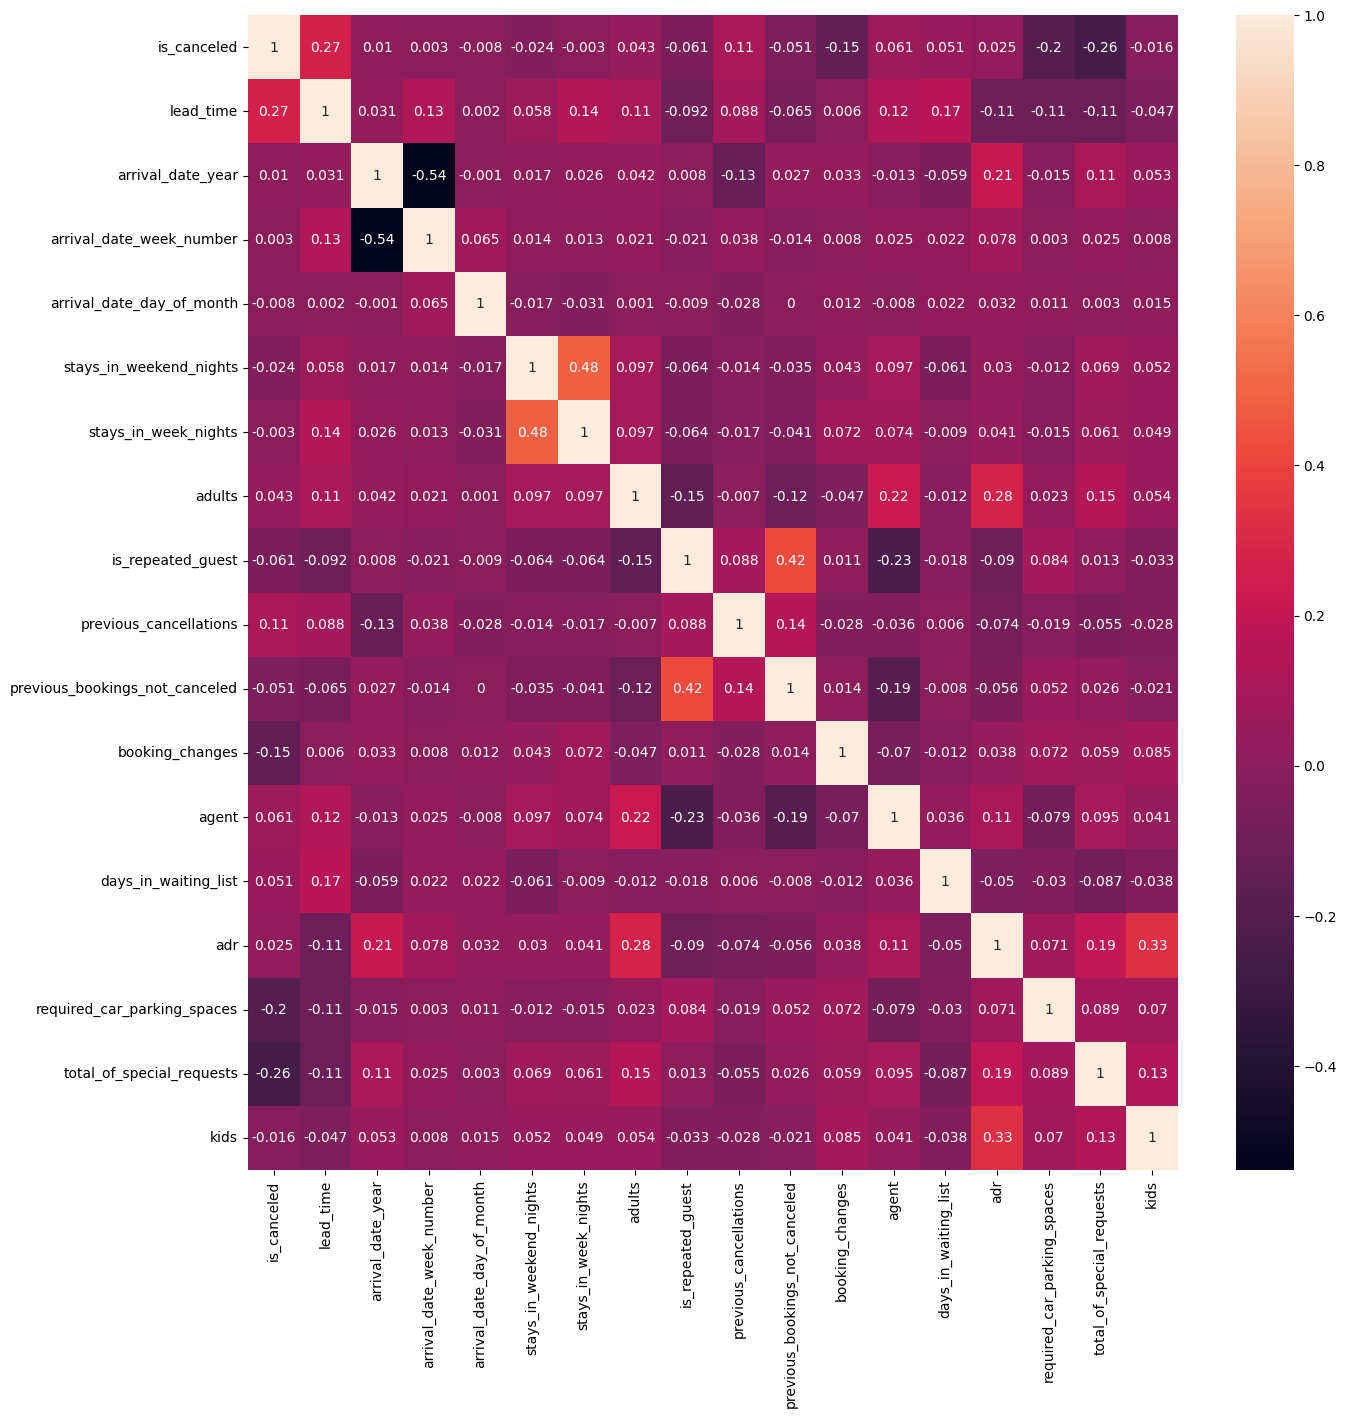

In [185]:
#heatmap
plt.figure(figsize = (15,15))
sns.heatmap(data.select_dtypes(include = 'number').corr().round(3),annot= True)

<Axes: ylabel='count'>

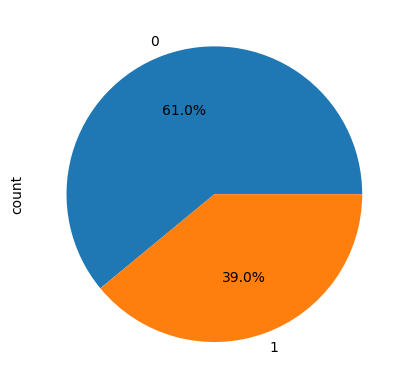

In [186]:
# Plotting a pie chart to visualize the distribution of 'is_canceled' values.

data['is_canceled'].value_counts().plot(kind='pie', autopct='%0.1f%%')


<Axes: ylabel='count'>

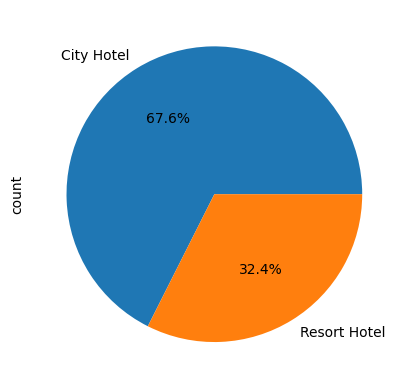

In [187]:
# Plotting a pie chart to visualize the distribution of hotel types.

data['hotel'].value_counts().plot(kind='pie', autopct='%0.1f%%')


<Axes: >

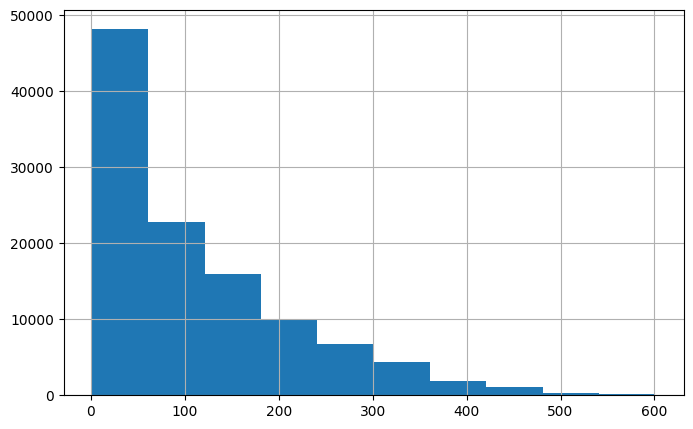

In [188]:
# Plotting a histogram to visualize the distribution of lead times.

data["lead_time"].hist(figsize=(8, 5))


<Axes: >

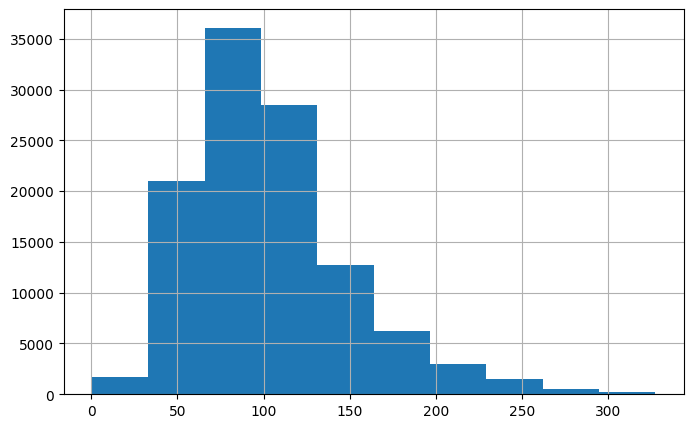

In [189]:
# Plotting a histogram to visualize the distribution of the Average Daily Rate (ADR).

data["adr"].hist(figsize=(8, 5))


<Axes: >

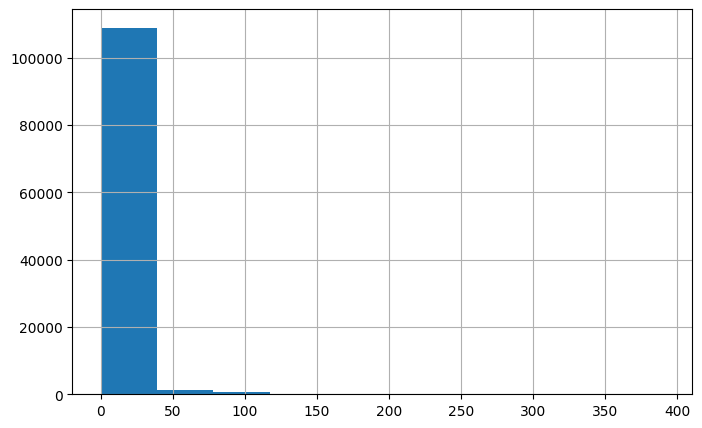

In [190]:
# Plotting a histogram to visualize the distribution of the number of days in the waiting list.

data["days_in_waiting_list"].hist(figsize=(8, 5))


<Axes: >

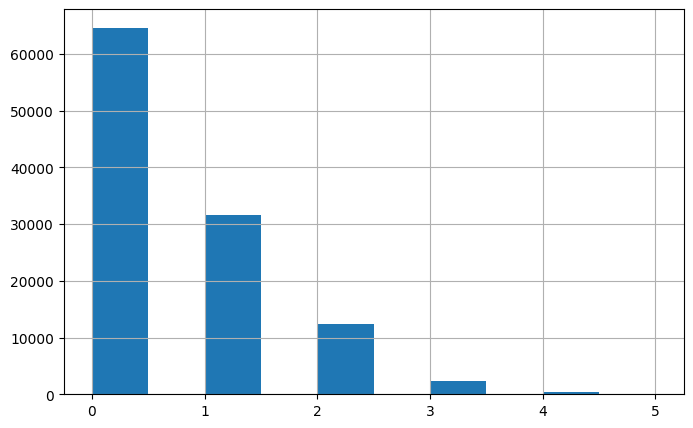

In [191]:
# Plotting a histogram to visualize the distribution of the total number of special requests made by guests.

data["total_of_special_requests"].hist(figsize=(8, 5))


<Axes: >

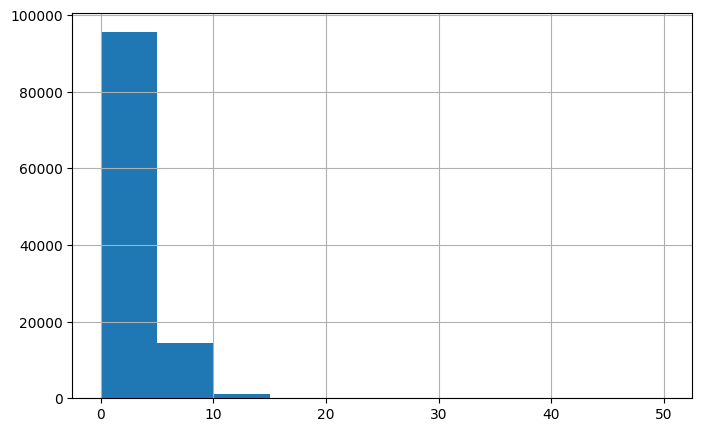

In [192]:
# Plotting a histogram to visualize the distribution of the number of weeknights stayed.

data["stays_in_week_nights"].hist(figsize=(8, 5))


<Axes: >

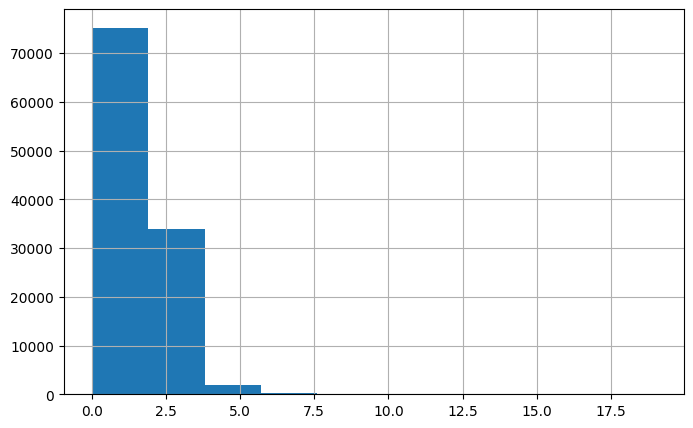

In [193]:
# Plotting a histogram to visualize the distribution of the number of weekend nights stayed.

data["stays_in_weekend_nights"].hist(figsize=(8, 5))


Text(0.5, 1.0, 'Box Plot of lead_time by is_canceled')

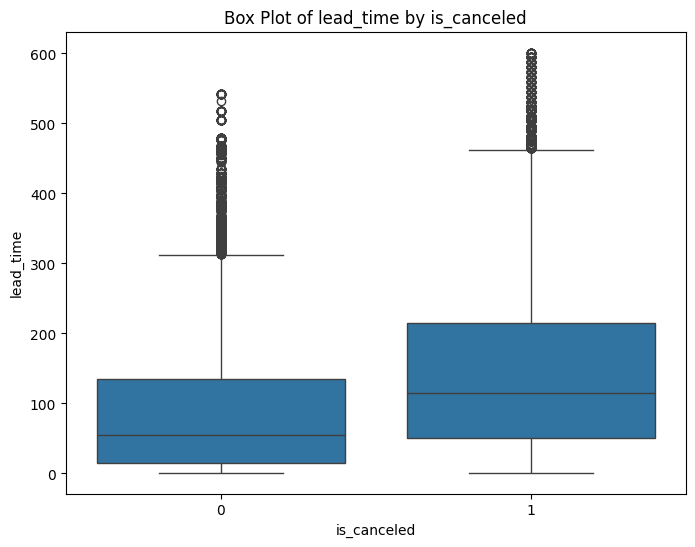

In [194]:

plt.figure(figsize=(8, 6))

# Generating a box plot to visualize the distribution of lead time based on cancellation status.

sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.xlabel('is_canceled')
plt.ylabel('lead_time')
plt.title('Box Plot of lead_time by is_canceled')



Text(0.5, 1.0, 'Box Plot of stays_in_weekend_nights by is_canceled')

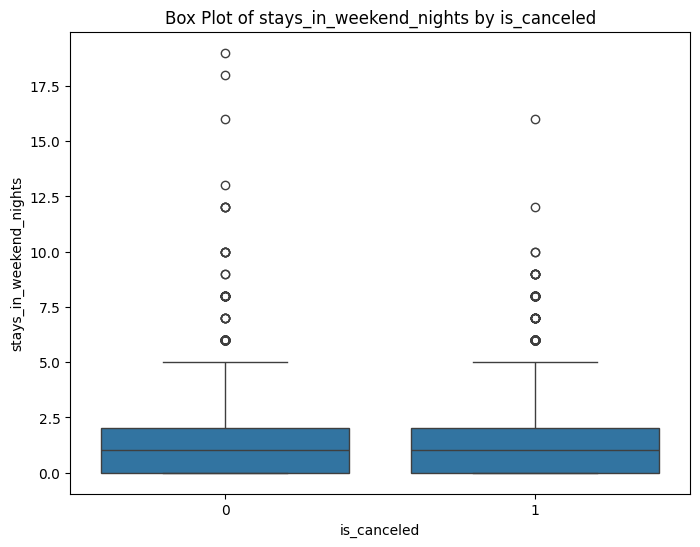

In [195]:

plt.figure(figsize=(8, 6))

# Generating a box plot to visualize the distribution of stays in weekend nights based on cancellation status.

sns.boxplot(x='is_canceled', y='stays_in_weekend_nights', data=data)
plt.xlabel('is_canceled')
plt.ylabel('stays_in_weekend_nights')
plt.title('Box Plot of stays_in_weekend_nights by is_canceled')




Text(0.5, 1.0, 'Box Plot of stays_in_week_nights by is_canceled')

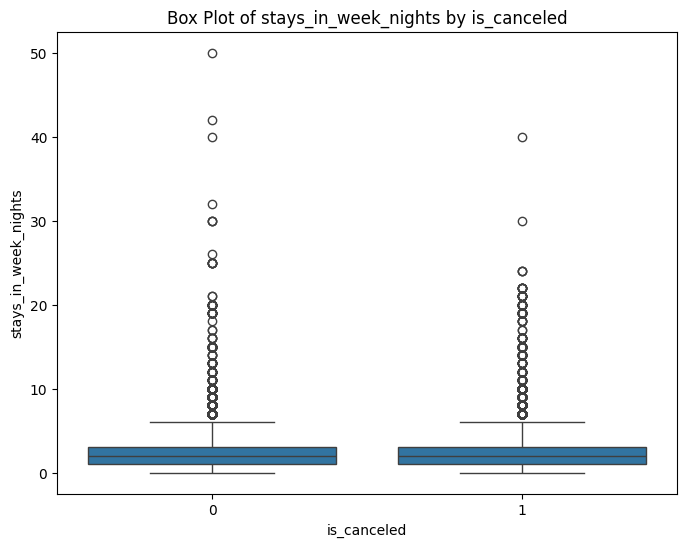

In [196]:

plt.figure(figsize=(8, 6))

# Generating a box plot to visualize the distribution of stays in weeknights based on cancellation status.

sns.boxplot(x='is_canceled', y='stays_in_week_nights', data=data)
plt.xlabel('is_canceled')
plt.ylabel('stays_in_week_nights')
plt.title('Box Plot of stays_in_week_nights by is_canceled')



Text(0.5, 1.0, 'Box Plot of adr by is_canceled')

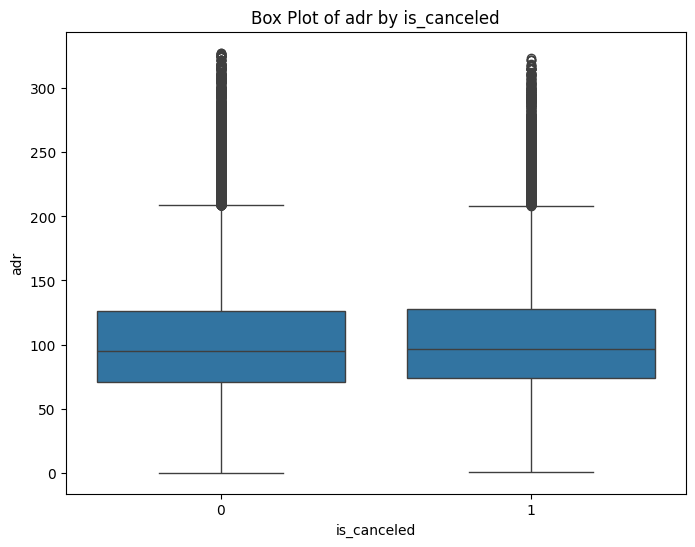

In [197]:

plt.figure(figsize=(8, 6))

# Generating a box plot to visualize the distribution of Average Daily Rate (ADR) based on cancellation status.

sns.boxplot(x='is_canceled', y='adr', data=data)
plt.xlabel('is_canceled')
plt.ylabel('adr')
plt.title('Box Plot of adr by is_canceled')



Text(0.5, 1.0, 'Box Plot of days_in_waiting_list by is_canceled')

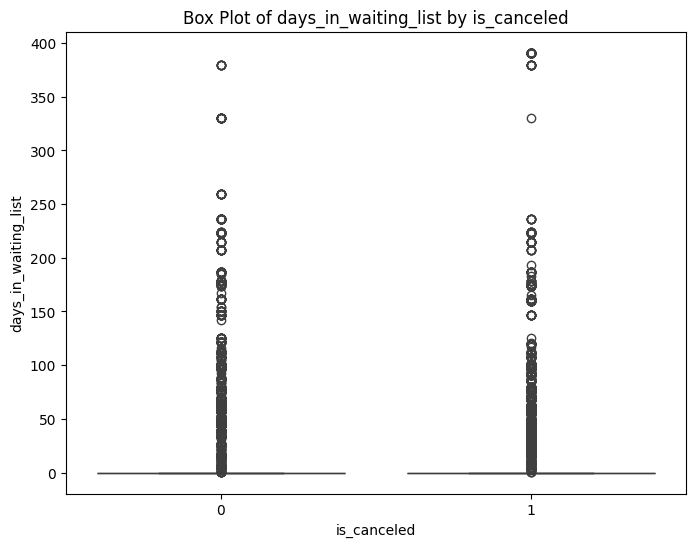

In [198]:

plt.figure(figsize=(8, 6))

# Generating a box plot to visualize the distribution of days spent in the waiting list based on cancellation status.
sns.boxplot(x='is_canceled', y='days_in_waiting_list', data=data)
plt.xlabel('is_canceled')
plt.ylabel('days_in_waiting_list')
plt.title('Box Plot of days_in_waiting_list by is_canceled')



<Axes: xlabel='is_canceled'>

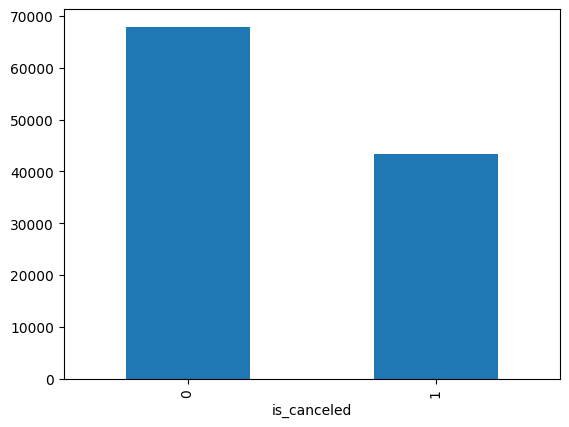

In [199]:
# Plotting a bar chart to visualize the count of canceled and non-canceled bookings.

data['is_canceled'].value_counts().plot(kind='bar')




<Axes: ylabel='count'>

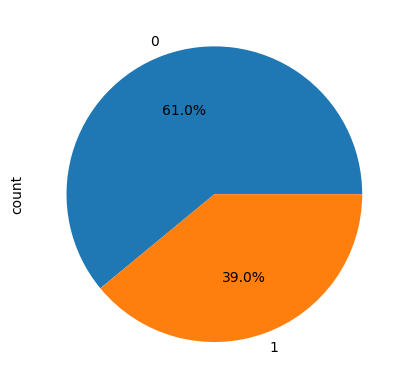

In [200]:
# Plotting a pie chart to visualize the proportion of canceled and non-canceled bookings.

data['is_canceled'].value_counts().plot(kind='pie', autopct='%0.1f%%')



<Axes: ylabel='Density'>

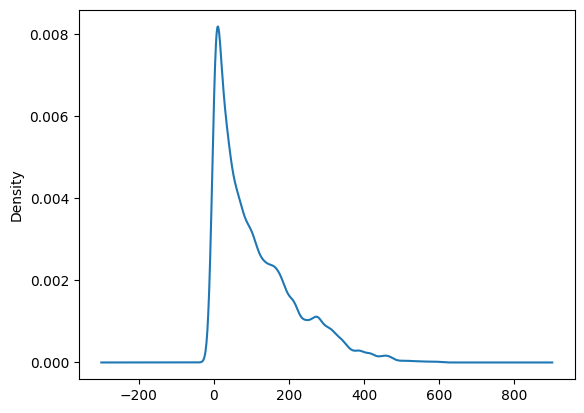

In [201]:
# Plotting a kernel density estimate (KDE) plot to visualize the distribution of lead times.

data['lead_time'].plot(kind='kde')


<Axes: ylabel='Density'>

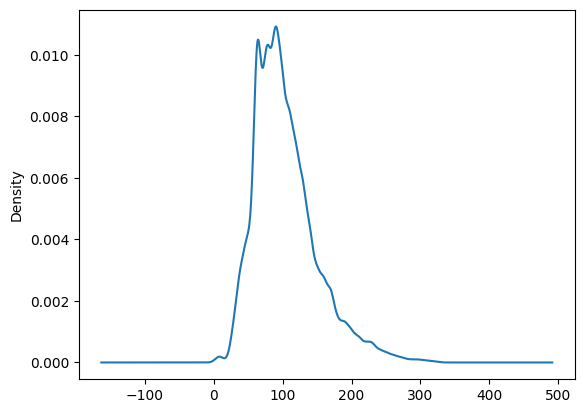

In [202]:
# Plotting a kernel density estimate (KDE) plot to visualize the distribution of Average Daily Rate (ADR).

data['adr'].plot(kind='kde')




<Axes: xlabel='market_segment'>

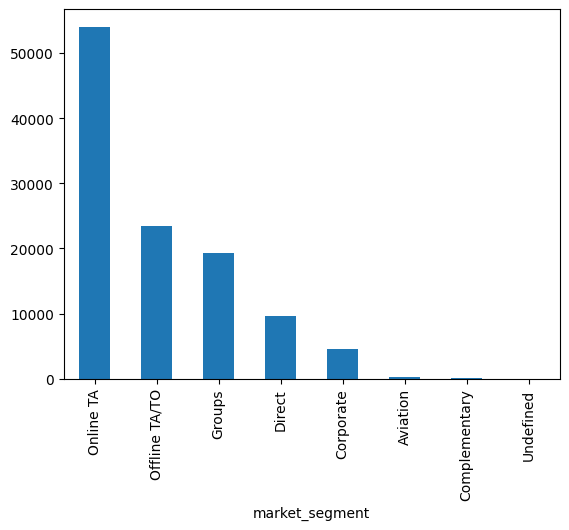

In [203]:
# Plotting a bar chart to visualize the count of each market segment.

data['market_segment'].value_counts().plot(kind='bar')



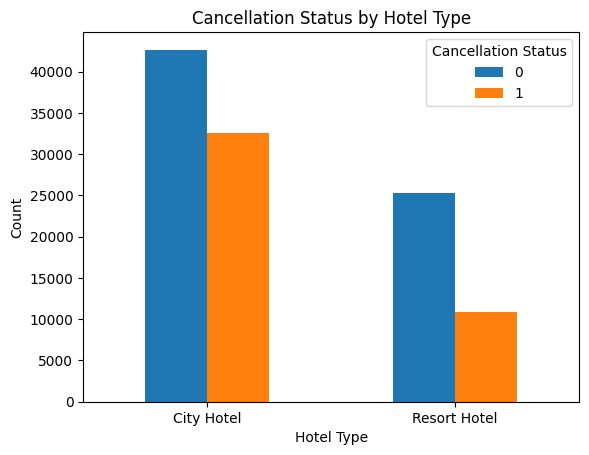

In [204]:

summary_table = pd.crosstab(data['hotel'], data['is_canceled'])

# Plotting a grouped bar chart to visualize the cancellation status by hotel type.
summary_table.plot(kind='bar', stacked=False)
plt.title('Cancellation Status by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status')
plt.show()


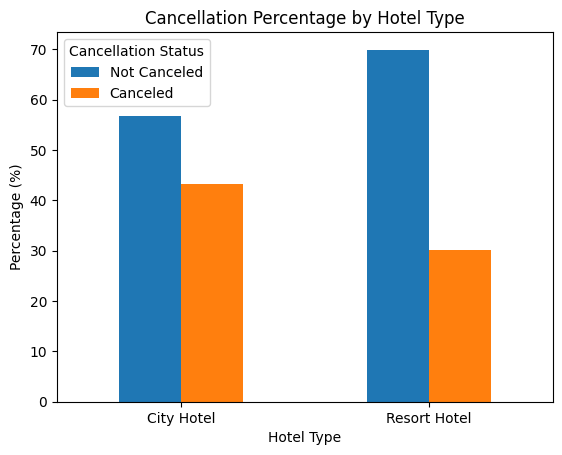

In [205]:

summary_table1 = pd.crosstab(data['hotel'], data['is_canceled'], normalize='index')
summary_table1 *= 100

# Plotting a grouped bar chart to visualize the cancellation percentage by hotel type.
summary_table1.plot(kind='bar', stacked=False)
plt.title('Cancellation Percentage by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()



<Figure size 1500x2000 with 0 Axes>

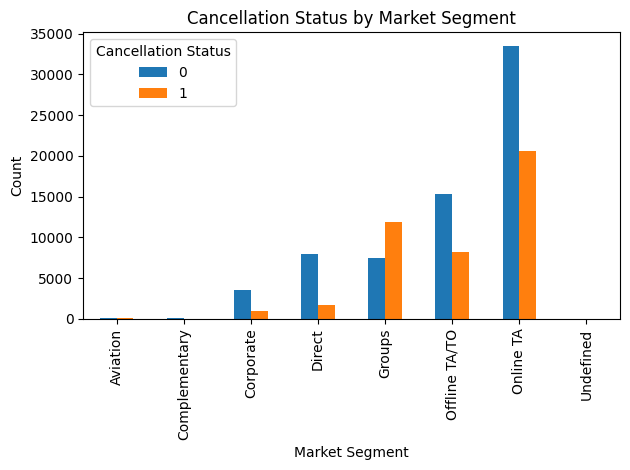

In [206]:

plt.figure(figsize=(15, 20))
summary_table = pd.crosstab(data['market_segment'], data['is_canceled'])

# Plotting a grouped bar chart to visualize the cancellation status by market segment
summary_table.plot(kind='bar', stacked=False)
plt.title('Cancellation Status by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Cancellation Status')
plt.tight_layout()
plt.show()


<Figure size 2000x2000 with 0 Axes>

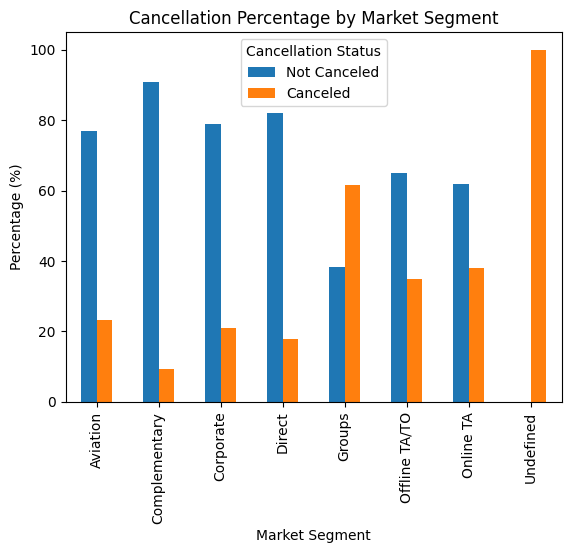

In [207]:

plt.figure(figsize=(20, 20))
summary_table2 = pd.crosstab(data['market_segment'], data['is_canceled'], normalize="index")
summary_table2 *= 100

# Plotting a grouped bar chart to visualize the cancellation percentage by market segment.
summary_table2.plot(kind='bar', stacked=False)
plt.title('Cancellation Percentage by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Percentage (%)')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()



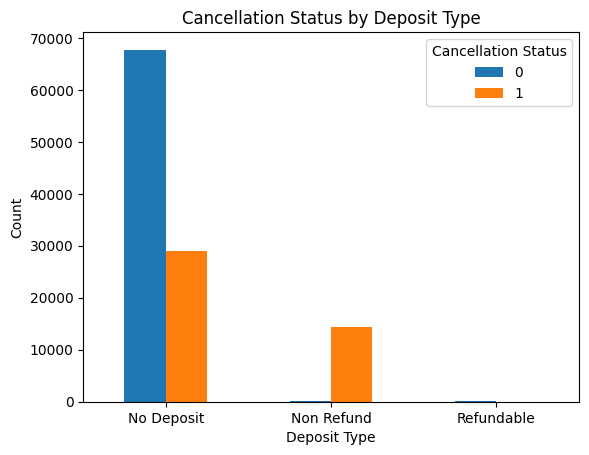

In [208]:

summary_table = pd.crosstab(data['deposit_type'], data['is_canceled'])
summary_table.plot(kind='bar', stacked=False)
plt.title('Cancellation Status by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status')
plt.show()


<Figure size 10000x10000 with 0 Axes>

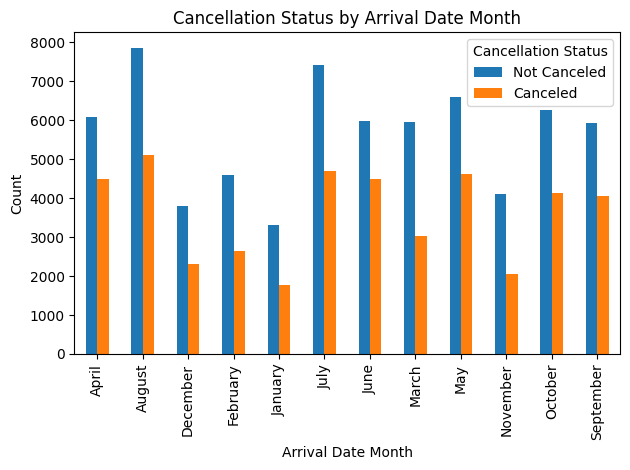

In [209]:

plt.figure(figsize=(100, 100))
summary_table = pd.crosstab(data['arrival_date_month'], data['is_canceled'])
summary_table.plot(kind='bar', stacked=False)
plt.title('Cancellation Status by Arrival Date Month')
plt.xlabel('Arrival Date Month')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()


<Figure size 1500x2000 with 0 Axes>

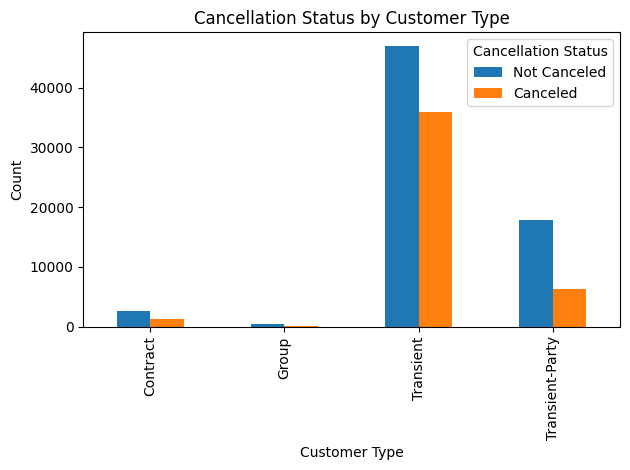

In [210]:

plt.figure(figsize=(15, 20))
summary_table = pd.crosstab(data['customer_type'], data['is_canceled'])

# Plotting a grouped bar chart to visualize the cancellation status by customer type.
summary_table.plot(kind='bar', stacked=False)
plt.title('Cancellation Status by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()


<Figure size 1500x2000 with 0 Axes>

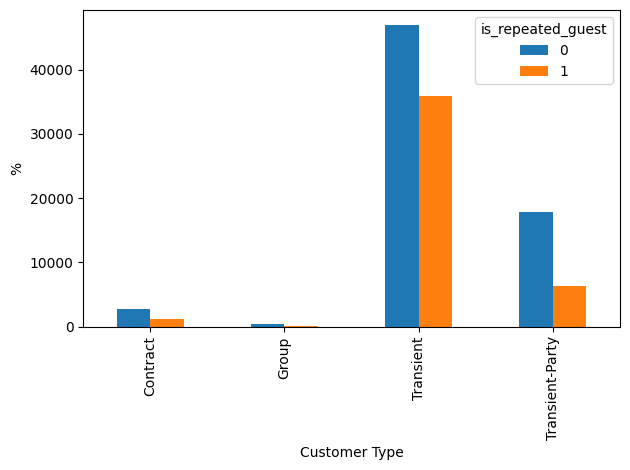

In [211]:

plt.figure(figsize=(15, 20))
summary_table5 = pd.crosstab(data['customer_type'], data['is_repeated_guest'], normalize="index")
summary_table5 *= 100

# Plotting a grouped bar chart to visualize the percentage of repeated guests by customer type.
summary_table.plot(kind='bar', stacked=False)
plt.xlabel('Customer Type')
plt.ylabel('%')
plt.legend(title='is_repeated_guest')
plt.tight_layout()
plt.show()



<Figure size 1500x2000 with 0 Axes>

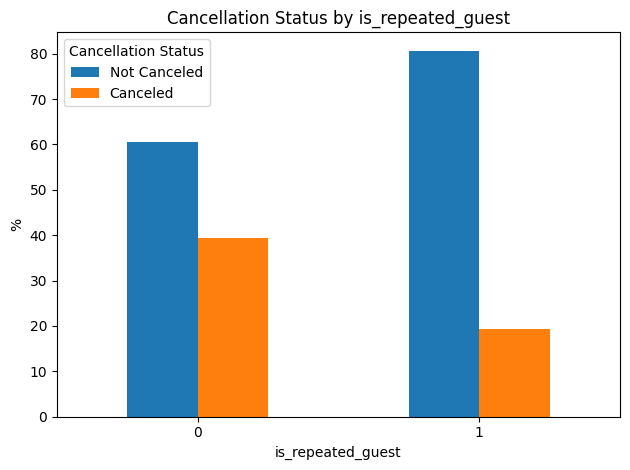

In [212]:

plt.figure(figsize=(15, 20))
summary_table4 = pd.crosstab(data['is_repeated_guest'], data['is_canceled'], normalize="index")
summary_table4 *= 100

# Plotting a grouped bar chart to visualize the percentage of canceled and non-canceled bookings by is_repeated_guest.
summary_table4.plot(kind='bar', stacked=False)
plt.title('Cancellation Status by is_repeated_guest')
plt.xlabel('is_repeated_guest')
plt.ylabel('%')
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()


In [213]:
# box plot of price based on reserved room_type
df = data[data['is_canceled'] == 0]

px.box(data_frame = df, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

In [214]:
# filtering out resort and city hotel types
data_resort = data[(data['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [215]:
# price of resort hotel type per month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
# price of city hotel type per month
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the arrival_date_month to a Categorical data type with the order defined
resort_hotel['arrival_date_month'] = pd.Categorical(resort_hotel['arrival_date_month'], categories=months_order, ordered=True)
city_hotel['arrival_date_month'] = pd.Categorical(city_hotel['arrival_date_month'], categories=months_order, ordered=True)
# Sort the DataFrame based on the ordered categorical
resort_hotel = resort_hotel.sort_values('arrival_date_month')
city_hotel = city_hotel.sort_values('arrival_date_month')

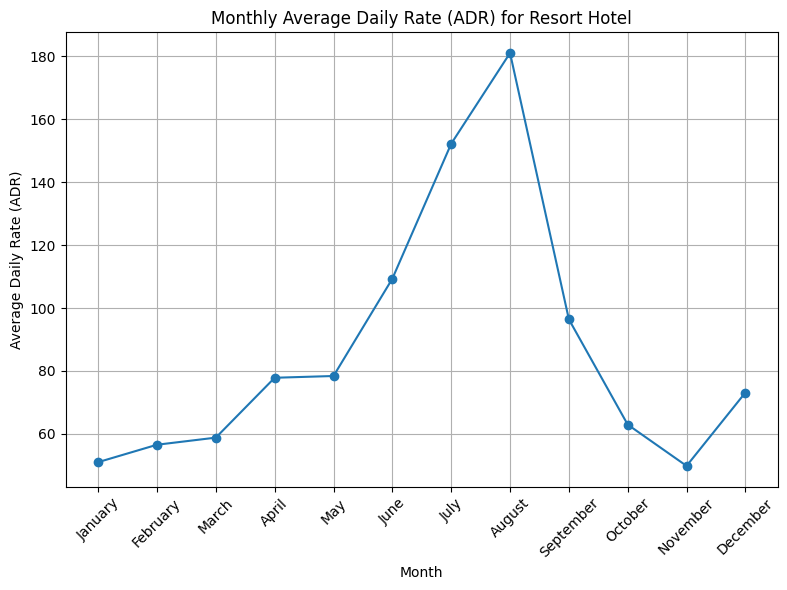

In [216]:

plt.figure(figsize=(8, 6))

# Plotting a line chart to visualize the monthly average daily rate (ADR) for the resort hotel.

plt.plot(resort_hotel['arrival_date_month'], resort_hotel['adr'], marker='o')
plt.title('Monthly Average Daily Rate (ADR) for Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


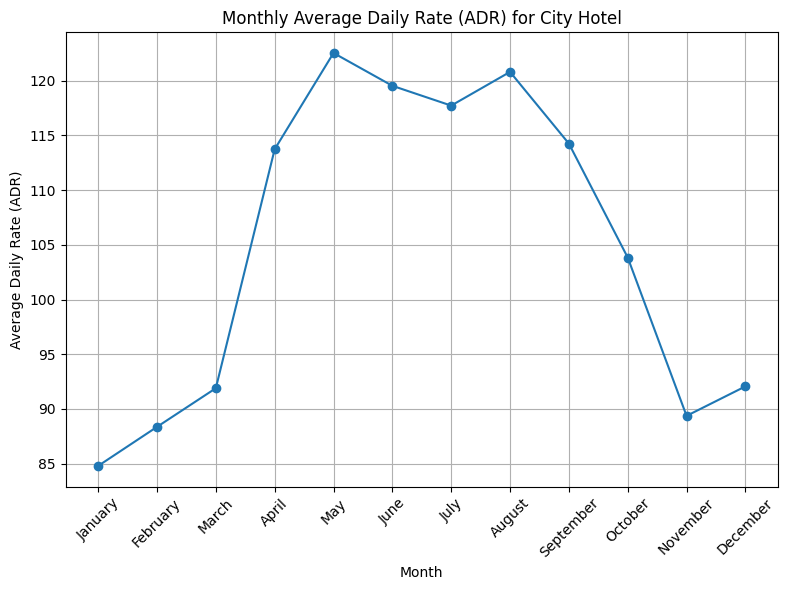

In [217]:

plt.figure(figsize=(8, 6))

# Plotting a line chart to visualize the monthly average daily rate (ADR) for the city hotel.

plt.plot(city_hotel['arrival_date_month'], city_hotel['adr'], marker='o')
plt.title('Monthly Average Daily Rate (ADR) for City Hotel')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Encoding the categorical varibles


In [218]:
# mapping month names to their corresponding numerical values.
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping)


In [219]:

categorical_columns = data.select_dtypes(include=['object'])

# Create a new DataFrame 'categorical_df' containing only the selected categorical columns.
categorical_df = pd.DataFrame(categorical_columns)


In [220]:
# Retrieve the names of the columns in the DataFrame 'categorical_df', which contains only categorical columns.
categorical_names = categorical_df.columns


In [221]:
categorical_names

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [222]:
# Convert categorical variables into dummy/indicator variables using one-hot encoding.
data_filt = pd.get_dummies(data, columns=categorical_names, drop_first=True)


# Splitting data
# Building Models

In [223]:
data_filt.shape

(111390, 47)

In [224]:

X = data_filt.drop(['is_canceled'], axis=1)
y = data_filt['is_canceled']

In [225]:
# Split the data into training and test sets, with 20% of the data reserved for testing and stratifying by 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [226]:
X_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,...,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
37855,20,2017,6,26,29,0,2,1,0,0,...,False,False,False,False,False,False,False,False,True,False
54853,386,2016,7,31,28,0,2,2,0,0,...,False,False,False,False,False,True,False,False,True,False
38735,140,2017,7,30,26,0,2,2,0,0,...,True,False,False,False,False,False,False,False,True,False
72954,337,2017,8,32,10,1,3,2,0,0,...,False,False,False,False,False,False,False,False,True,False
23776,31,2016,4,18,30,2,1,1,0,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69199,67,2017,5,21,27,1,1,3,0,0,...,False,True,False,False,False,False,False,False,True,False
77299,256,2015,9,38,14,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,True
3446,183,2015,12,50,8,8,20,2,0,0,...,False,True,False,False,False,False,False,False,True,False
61167,15,2016,12,49,3,0,1,2,0,0,...,False,False,False,False,False,False,False,False,True,False


In [227]:

print("NaNs in X_train:", np.isnan(X_train).any())
print("NaNs in X_test:", np.isnan(X_test).any())

# Replace any NaN values in X_train with the column-wise median of the training data
X_train = np.where(np.isnan(X_train), np.nanmedian(X_train, axis=0), X_train)

# Replace any NaN values in X_test with the column-wise median of the test data
X_test = np.where(np.isnan(X_test), np.nanmedian(X_test, axis=0), X_test)


NaNs in X_train: lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
agent                             False
days_in_waiting_list              False
adr                               False
required_car_parking_spaces       False
total_of_special_requests         False
kids                              False
hotel_Resort Hotel                False
meal_FB                           False
meal_HB                           False
meal_SC                           False
meal_Undefined                    False
market_segment_Complementary      False
market_segment_Corporat

In [228]:
y_train

37855    0
54853    1
38735    0
72954    1
23776    0
        ..
69199    1
77299    0
3446     0
61167    1
35169    0
Name: is_canceled, Length: 89112, dtype: int64

In [229]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(89112, 46) (89112,)
(22278, 46) (22278,)


In [230]:
# Initialize the StandardScaler to standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

# Fit the scaler to the training data to compute the mean and standard deviation for later scaling
sc.fit(X_train)

# Transform the training data using the computed mean and standard deviation to standardize it
X_train_std = sc.transform(X_train)

# Apply the same transformation to the test data to ensure consistency in feature scaling
X_test_std = sc.transform(X_test)

In [231]:


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

# Predict the class labels for the test set
y_pred = dt.predict(X_test_std)

# Import accuracy_score to compute the subset accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))





Accuracy: 0.82
[[11539  2047]
 [ 1995  6697]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     13586
           1       0.77      0.77      0.77      8692

    accuracy                           0.82     22278
   macro avg       0.81      0.81      0.81     22278
weighted avg       0.82      0.82      0.82     22278



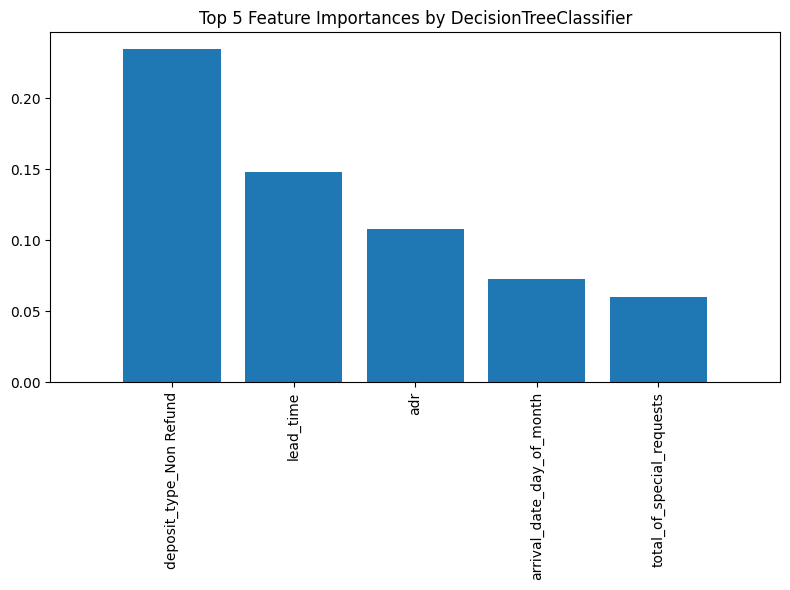

In [232]:

# Retrieve and store the feature importances from the fitted  decision tree model
importances = dt.feature_importances_

# Sort the indices of the features based on their importance in descending order
indices = np.argsort(importances)[::-1]
feat_labels = data_filt.columns[1:]

# Create a list of feature labels sorted according to their importance, determined previously
sorted_feat_labels = [feat_labels[i] for i in indices]

# Define the number of top features to select
top_n = 5

# Slice the sorted feature labels and their corresponding importances to get the top 5
sorted_feat_labels = sorted_feat_labels[:top_n]
importances = importances[indices[:top_n]]

plt.figure(figsize=(8, 6))
plt.title('Top 5 Feature Importances by DecisionTreeClassifier')
plt.bar(range(top_n), importances, align='center')
plt.xticks(range(top_n), sorted_feat_labels, rotation=90)
plt.xlim([-1, top_n])
plt.tight_layout()
plt.show()


In [233]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100000.0, random_state=0, max_iter=10000)

# Fit the Logistic Regression model on the standardized training data
lr.fit(X_train_std, y_train)

# Predict the class labels for the standardized test data
y_pred = lr.predict(X_test_std)

# Calculate the accuracy score to assess the overall correctness of the model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# Generate the confusion matrix and classification report to evaluate the performance of the classification
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.80
[[12503  1083]
 [ 3353  5339]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     13586
           1       0.83      0.61      0.71      8692

    accuracy                           0.80     22278
   macro avg       0.81      0.77      0.78     22278
weighted avg       0.81      0.80      0.79     22278



# Gradient Boosting

In [234]:

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Fit the model to the training data
gb.fit(X_train_std, y_train)  # X_train: features for training, y_train: labels for training

# Predict the labels for the test dataset
y_pred_gb = gb.predict(X_test_std)  # X_test: features for testing

# Calculate the accuracy of the model on the test data
acc_gb = accuracy_score(y_test, y_pred_gb)  # y_test: true labels for testing

# Generate the confusion matrix for the test data predictions
conf = confusion_matrix(y_test, y_pred_gb)  # Confusion matrix shows true vs predicted labels


clf_report = classification_report(y_test, y_pred_gb)  # Includes precision, recall, f1-score, etc.
print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Gradient Boosting Classifier is : 0.80599694766137
Confusion Matrix : 
[[12589   997]
 [ 3325  5367]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     13586
           1       0.84      0.62      0.71      8692

    accuracy                           0.81     22278
   macro avg       0.82      0.77      0.78     22278
weighted avg       0.81      0.81      0.80     22278



In [235]:

from sklearn.linear_model import Perceptron
# Initialize the Perceptron with a specific number of iterations, a learning rate, and a random state for reproducibility
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)

# Fit the Perceptron model on the standardized training data
ppn.fit(X_train_std, y_train)

# Use the trained Perceptron model to make predictions on the standardized test data
y_pred = ppn.predict(X_test_std)


from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.73
[[10686  2900]
 [ 3124  5568]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     13586
           1       0.66      0.64      0.65      8692

    accuracy                           0.73     22278
   macro avg       0.72      0.71      0.71     22278
weighted avg       0.73      0.73      0.73     22278



In [236]:

from sklearn.ensemble import RandomForestClassifier
# Define feature labels, excluding the first column which typically might be an index or non-feature column
feat_labels = data_filt.columns[1:]

# Initialize the Random Forest classifier with 100 trees, enabling parallel computation and a fixed random state for reproducibility
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Fit the Random Forest model to the training data
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




Accuracy: 0.74
[[13585     1]
 [ 5777  2915]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     13586
           1       1.00      0.34      0.50      8692

    accuracy                           0.74     22278
   macro avg       0.85      0.67      0.66     22278
weighted avg       0.82      0.74      0.70     22278



In [237]:
# Drop the 'is_canceled' column from the data_filt DataFrame and store the result in X.
X = data_filt.drop(['is_canceled'], axis=1)

# Extract the 'is_canceled' column from the data_filt DataFrame and store it in y.
y = data_filt['is_canceled']


In [238]:
# Convert the DataFrame X to a NumPy array and store it in K_X.
K_X = X.values
# Convert the Series y to a NumPy array and store it in K_y.
K_y = y.values


In [239]:

from sklearn.model_selection import train_test_split

# X_train and y_train are the features and target for the training set.
# X_test and y_test are the features and target for the test set.
X_train, X_test, y_train, y_test = \
train_test_split(K_X, K_y, test_size=0.20, random_state=1)


In [240]:
# K-Fold
# Stratified K-fold cross-validation ("stratified": % of each label same in each fold)
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Compute the number of splits for the StratifiedKFold object using the training data
skf.get_n_splits(X_train, y_train)



10

# Pipeline

In [241]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe_lr = Pipeline([
    ('scl', StandardScaler()),
    ('clf', LogisticRegression(random_state=1))
])

scores = []
k = 0

# Execute a loop over the folds, provided by the StratifiedKFold object
for train, test in skf.split(X_train, y_train):
    k += 1  # Increment the fold number


    pipe_lr.fit(X_train[train], y_train[train])

    score = pipe_lr.score(X_train[test], y_train[test])

    scores.append(score)


    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k, np.bincount(y_train[train]), score))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 1, Class dist.: [49001 31199], Acc: 0.803


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 2, Class dist.: [49001 31199], Acc: 0.798


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 3, Class dist.: [49002 31199], Acc: 0.806


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 4, Class dist.: [49002 31199], Acc: 0.800


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 5, Class dist.: [49002 31199], Acc: 0.807


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 6, Class dist.: [49002 31199], Acc: 0.799


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 7, Class dist.: [49001 31200], Acc: 0.807


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 8, Class dist.: [49001 31200], Acc: 0.813


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fold: 9, Class dist.: [49001 31200], Acc: 0.809
Fold: 10, Class dist.: [49001 31200], Acc: 0.798


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [242]:

from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(estimator=pipe_lr,  # estimator: the model to evaluate, here 'pipe_lr' which seems to be a pipeline
                         X=X_train,          # X_train: the training data features
                         y=y_train,          # y_train: the training data labels
                         cv=10,              # cv: number of folds in k-fold cross-validation
                         n_jobs=1)           # n_jobs: number of CPU cores to use (1 means only one core)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

CV accuracy scores: [0.80251346 0.79768851 0.80574571 0.79968578 0.80686792 0.7992369
 0.80664347 0.81281562 0.80922455 0.79800247]
CV accuracy: 0.804 +/- 0.005


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

